In [2]:

import pandas as pd
import os
import glob

path = os.getcwd() + "\\BLM\\"
path


df = pd.read_csv("blm_corpus.csv")
#df.astype('category')
df.tail()


,message_id,user_id,blacklivesmatter,alllivesmatter,bluelivesmatter
41801148,755197018079756288,69190453,0,0,1
41801149,755196980431876096,3324411872,0,0,1
41801150,755193037223886848,2903049288,0,0,1
41801151,755191577715306496,1096107828,0,0,1
41801152,755192061972783104,331059968,0,0,1


In [3]:
# In[117]:

blm = df[df['blacklivesmatter'] == 1].copy()
print(blm.tail())
len(blm)

                  message_id             user_id  blacklivesmatter  \
41801006  755201956000313346          2887813801                 1   
41801059  755204821666271233            29471268                 1   
41801083  755193330154082304          2836688018                 1   
41801118  755194449035010048            81240509                 1   
41801147  755200274386579457  712418887808069632                 1   

          alllivesmatter  bluelivesmatter  
41801006               0                1  
41801059               0                1  
41801083               1                1  
41801118               0                1  
41801147               0                1  


36892699

In [7]:
test = blm.sample(n= 35000, replace=False,random_state = 1)['message_id'].tolist()

test

[568510273096699904,
 1272877495235293185,
 1266359442154467335,
 1269443800939630594,
 1275250875716571138,
 830043312459493376,
 1277705392718516229,
 1270135481284657156,
 1271998360539369472,
 592045774231339009,
 828693364006600704,
 1269005662853292033,
 1270021292104671232,
 571357045024108544,
 1271458518814658560,
 1269854355823484928,
 1265673601656729600,
 1269461853224218629,
 1269023509092741121,
 754519148525391872,
 1272180266480607233,
 1269712377769066497,
 1271082408587083778,
 1268733707910672385,
 1271897367650934791,
 1268369684946132992,
 853744772036644866,
 1270817115994492928,
 825091598027337728,
 1139632389343367168,
 1270916538384683008,
 1161997949288767488,
 1272298226230714368,
 1269639715306668032,
 1269084949514248192,
 1269718870568382465,
 1269707552427855872,
 1260616966433316864,
 1265732569863196672,
 961097880210739200,
 1277011827239591936,
 641665478100824064,
 1268739032495779840,
 1272623452583837698,
 1271025169788780544,
 1272770746465411078

In [8]:

import numpy as np
path1 = "C:\\Users\\Administrator\\Desktop\\Spring 2020-2021\\SPROJ\\BLM_test"
np.savetxt(path1 + "\\test.txt",test,fmt='%d')

In [9]:
# In[189]:


import gzip
import json

from tqdm import tqdm
from twarc import Twarc
from pathlib import Path

twarc = Twarc()
data_dirs = ['C:\\Users\\Administrator\\Desktop\\Spring 2020-2021\\SPROJ\\BLM_test']


def main():
    for data_dir in data_dirs:
        for path in Path(data_dir).iterdir():
            if path.name.endswith('.txt'):
                hydrate(path)


def _reader_generator(reader):
    b = reader(1024 * 1024)
    while b:
        yield b
        b = reader(1024 * 1024)


def raw_newline_count(fname):
    """
    Counts number of lines in file
    """
    f = open(fname, 'rb')
    f_gen = _reader_generator(f.raw.read)
    return sum(buf.count(b'\n') for buf in f_gen)


def hydrate(id_file):
    print('hydrating {}'.format(id_file))

    gzip_path = id_file.with_suffix('.jsonl.gz')
    if gzip_path.is_file():
        print('skipping json file already exists: {}'.format(gzip_path))
        return

    num_ids = raw_newline_count(id_file)

    with gzip.open(gzip_path, 'w') as output:
        with tqdm(total=num_ids) as pbar:
            for tweet in twarc.hydrate(id_file.open()):
                output.write(json.dumps(tweet).encode('utf8') + b"\n")
                pbar.update(1)


if __name__ == "__main__":
    main()


hydrating C:\Users\Administrator\Desktop\Spring 2020-2021\SPROJ\BLM_test\test.txt


 81%|█████████████████████████████████████████████████████████████▎              | 28254/35000 [05:09<01:13, 91.22it/s]


In [10]:
# In[190]:


all_files = glob.glob(path1 + "/*.gz")
li = []
for filename in all_files:
    df = pd.read_json(filename,compression='infer',lines=True)
    li.append(df)
data_1 = pd.concat(li,axis=0,ignore_index=True)


# In[191]:


data_1.tail()


,created_at,id,id_str,full_text,truncated,display_text_range,entities,source,in_reply_to_status_id,in_reply_to_status_id_str,...,lang,retweeted_status,extended_entities,quoted_status_id,quoted_status_id_str,quoted_status_permalink,quoted_status,withheld_in_countries,withheld_scope,withheld_copyright
28249,2016-07-10 01:39:32+00:00,751953975037923328,751953975037923328,“@zesty_politics: Palin: #BlackLivesMatter is ...,False,"[0, 124]","{'hashtags': [{'text': 'BlackLivesMatter', 'in...","<a href=""http://twitter.com/#!/download/ipad"" ...",7.519523e+17,7.519523e+17,...,en,NaN,"{'media': [{'id': 751952329784561664, 'id_str'...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
28250,2017-07-04 04:16:13+00:00,882090647313952768,882090647313952768,RT @AshAgony: Family of #DelrawnSmall lighting...,False,"[0, 140]","{'hashtags': [{'text': 'DelrawnSmall', 'indice...","<a href=""http://twitter.com/download/android"" ...",NaN,NaN,...,en,{'created_at': 'Tue Jul 04 04:13:17 +0000 2017...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28251,2017-07-15 21:23:32+00:00,886335445344411650,886335445344411648,Sprout House hosted an event for our campaign ...,False,"[0, 135]","{'hashtags': [{'text': 'JamarClark', 'indices'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,...,en,NaN,"{'media': [{'id': 886334909781950464, 'id_str'...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
28252,2018-02-05 23:20:36+00:00,960654420831809537,960654420831809536,RT @TheRoot: A life taken away too soon! \n\nH...,False,"[0, 140]","{'hashtags': [{'text': 'TrayvonMartin', 'indic...","<a href=""http://twitter.com"" rel=""nofollow"">Tw...",NaN,NaN,...,en,{'created_at': 'Mon Feb 05 14:35:54 +0000 2018...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28253,2018-04-23 15:24:01+00:00,988438351500869633,988438351500869632,RT @CJPatruno: When you speak to someone who g...,False,"[0, 140]","{'hashtags': [{'text': 'BlackLivesMatter', 'in...","<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,NaN,...,en,{'created_at': 'Mon Apr 23 01:51:37 +0000 2018...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
# In[192]:


data_1.iloc[0]








created_at                                           2019-02-15 23:42:06+00:00
id                                                         1096555278936334337
id_str                                                     1096555278936334336
full_text                    Colin Kaepernick doesn’t need the NFL to conti...
truncated                                                                False
display_text_range                                                    [0, 103]
entities                     {'hashtags': [{'text': 'BlackLivesMatter', 'in...
source                       <a href="http://twitter.com/download/iphone" r...
in_reply_to_status_id                                                      NaN
in_reply_to_status_id_str                                                  NaN
in_reply_to_user_id                                                        NaN
in_reply_to_user_id_str                                                    NaN
in_reply_to_screen_name                             

In [14]:
# In[194]:


data_1.set_index("created_at",inplace = True)

In [15]:
# In[198]:


#data_1['created_at'] = data_1['created_at'].to_string()
data_2020=data_1.loc['2020']

data_2020
# In[ ]:

,id,id_str,full_text,truncated,display_text_range,entities,source,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,...,lang,retweeted_status,extended_entities,quoted_status_id,quoted_status_id_str,quoted_status_permalink,quoted_status,withheld_in_countries,withheld_scope,withheld_copyright
created_at,,,,,,,,,,,,,,,,,,,,,
2020-05-13 17:04:40+00:00,1260616966433316864,1260616966433316864,RT @DanniJavaid94: @_SJPeace_ Even African Ame...,False,"[0, 116]","{'hashtags': [{'text': 'BlackLivesMatter', 'in...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,...,en,{'created_at': 'Wed May 13 06:34:48 +0000 2020...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-05-16 15:03:09+00:00,1261673548885745665,1261673548885745664,RT @koan4u: 10 lessons I will never have to te...,False,"[0, 122]","{'hashtags': [{'text': 'ResistRacism', 'indice...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,...,en,{'created_at': 'Sat May 16 14:38:44 +0000 2020...,"{'media': [{'id': 1261667297833267203, 'id_str...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-05-27 15:57:56+00:00,1265673601656729600,1265673601656729600,so i come on to twitter to see that #AllLivesM...,False,"[0, 94]","{'hashtags': [{'text': 'AllLivesMatter', 'indi...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,...,en,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-05-27 19:52:15+00:00,1265732569863196672,1265732569863196672,RT @shalash_227: FUCK THIS!! These men should ...,False,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,...,en,{'created_at': 'Wed May 27 00:46:01 +0000 2020...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-05-29 12:22:09+00:00,1266344072924426240,1266344072924426240,RT @glxyuchan: tweeting abt blm won't make you...,False,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,NaN,NaN,...,en,{'created_at': 'Fri May 29 07:01:42 +0000 2020...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-25 14:26:04+00:00,1276159732399685635,1276159732399685632,Another leftist “study” https://t.co/dhLQnslODO,False,"[0, 23]","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,...,en,NaN,NaN,1.276016e+18,1.276016e+18,"{'url': 'https://t.co/dhLQnslODO', 'expanded':...",NaN,NaN,NaN,NaN
2020-06-26 23:17:07+00:00,1276655764367605760,1276655764367605760,RT @David_Leavitt: Trump's 200th judicial nomi...,False,"[0, 139]","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,...,en,{'created_at': 'Wed Jun 24 18:12:01 +0000 2020...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-06-29 20:54:16+00:00,1277706975724396545,1277706975724396544,RT @sabinenysa: If the videos look like this d...,False,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,...,en,{'created_at': 'Sun Jun 28 15:57:28 +0000 2020...,NaN,1.276695e+18,1.276695e+18,"{'url': 'https://t.co/UFgJYRwRKc', 'expanded':...",NaN,NaN,NaN,NaN


In [16]:
data_2020.reset_index(inplace=True)

In [18]:
data_2020=data_2020[(data_2020['possibly_sensitive'] == 1) | (data_2020['possibly_sensitive'] == 0) ]

In [19]:
import pandas as pd
import pandas as pd
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from textblob import TextBlob
import glob
import os
from pycorenlp import StanfordCoreNLP
import matplotlib.pyplot as plt

In [21]:
data_2020

,created_at,id,id_str,full_text,truncated,display_text_range,entities,source,in_reply_to_status_id,in_reply_to_status_id_str,...,lang,retweeted_status,extended_entities,quoted_status_id,quoted_status_id_str,quoted_status_permalink,quoted_status,withheld_in_countries,withheld_scope,withheld_copyright
1,2020-05-16 15:03:09+00:00,1261673548885745665,1261673548885745664,RT @koan4u: 10 lessons I will never have to te...,False,"[0, 122]","{'hashtags': [{'text': 'ResistRacism', 'indice...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,...,en,{'created_at': 'Sat May 16 14:38:44 +0000 2020...,"{'media': [{'id': 1261667297833267203, 'id_str...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2020-05-30 08:19:13+00:00,1266645325663678465,1266645325663678464,RT @its_emmanuelll: With everything going on p...,False,"[0, 93]","{'hashtags': [{'text': 'BlackLivesMatter', 'in...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,...,en,{'created_at': 'Sat May 30 06:41:04 +0000 2020...,"{'media': [{'id': 1266620480909443072, 'id_str...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2020-05-31 11:28:54+00:00,1267055449637097472,1267055449637097472,RT @buzztinholly: racism isn't born it's taugh...,False,"[0, 89]","{'hashtags': [{'text': 'BlackLivesMatter', 'in...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,...,en,{'created_at': 'Sun May 31 10:59:51 +0000 2020...,"{'media': [{'id': 1267048124884926466, 'id_str...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2020-06-01 05:28:49+00:00,1267327220676263936,1267327220676263936,RT @rosiegguks: ‼️ THREAD: PETITIONS TO SIGN ~...,False,"[0, 117]","{'hashtags': [{'text': 'BlackLivesMatter', 'in...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,...,en,{'created_at': 'Fri May 29 09:24:28 +0000 2020...,"{'media': [{'id': 1266299306538987521, 'id_str...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,2020-06-03 08:08:35+00:00,1268092201013256192,1268092201013256192,The best explanation I've seen as to why color...,False,"[0, 97]","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com/download/android"" ...",NaN,NaN,...,en,NaN,NaN,1.267898e+18,1.267898e+18,"{'url': 'https://t.co/HrdVS7kngi', 'expanded':...",{'created_at': 'Tue Jun 02 19:17:34 +0000 2020...,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22173,2020-06-08 03:31:11+00:00,1269834330546802689,1269834330546802688,So inspiring to join today's Queens Gathering ...,False,"[0, 238]","{'hashtags': [{'text': 'BlackLivesMatter', 'in...","<a href=""http://twitter.com/download/android"" ...",NaN,NaN,...,en,NaN,"{'media': [{'id': 1269834282538852352, 'id_str...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
22174,2020-06-08 17:15:36+00:00,1270041800141688832,1270041800141688832,They’re BIG MAD in the replies 😂😂😂 https://t.c...,False,"[0, 34]","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,...,en,NaN,NaN,1.269694e+18,1.269694e+18,"{'url': 'https://t.co/hhibqsxUn0', 'expanded':...",{'created_at': 'Sun Jun 07 18:11:36 +0000 2020...,NaN,NaN,NaN
22178,2020-06-11 04:11:56+00:00,1270931749040582656,1270931749040582656,If you’re going to be dumb you better be tough...,False,"[0, 47]","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,...,en,NaN,NaN,1.270929e+18,1.270929e+18,"{'url': 'https://t.co/QfY9n64sNi', 'expanded':...",{'created_at': 'Thu Jun 11 04:01:14 +0000 2020...,NaN,NaN,NaN
22195,2020-06-25 14:26:04+00:00,1276159732399685635,1276159732399685632,Another leftist “study” https://t.co/dhLQnslODO,False,"[0, 23]","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,...,en,NaN,NaN,1.276016e+18,1.276016e+18,"{'url': 'https://t.co/dhLQnslODO', 'expanded':...",NaN,NaN,NaN,NaN


In [20]:
len(data_2020.id.unique())

6149

In [22]:
data_2020.drop_duplicates(subset=["full_text"],inplace=True)
#june8.drop(axis=1,inplace=True)
data_2020=data_2020[data_2020.lang == 'en']

C:\Users\Administrator\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [23]:
data_2020.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3223 entries, 1 to 22199
Data columns (total 34 columns):
created_at                   3223 non-null datetime64[ns, UTC]
id                           3223 non-null int64
id_str                       3223 non-null int64
full_text                    3223 non-null object
truncated                    3223 non-null bool
display_text_range           3223 non-null object
entities                     3223 non-null object
source                       3223 non-null object
in_reply_to_status_id        142 non-null float64
in_reply_to_status_id_str    142 non-null float64
in_reply_to_user_id          191 non-null float64
in_reply_to_user_id_str      191 non-null float64
in_reply_to_screen_name      191 non-null object
user                         3223 non-null object
geo                          11 non-null object
coordinates                  11 non-null object
place                        98 non-null object
contributors                 0 non-null 

In [24]:
# Data Cleaning & Pre- Processing

import pandas as pd
import numpy as np
import re
import gensim
from gensim.utils import simple_preprocess
import nltk
from nltk.corpus import stopwords
from collections import Counter
from wordcloud import WordCloud
from textblob import TextBlob

#Taking a look at the data
df = data_2020.copy()

#Remove '@ User from the 'text' col
def remove_users(tweet, pattern1, pattern2):
    r = re.findall(pattern1, tweet)
    for i in r:
        tweet = re.sub(i, '', tweet)

    r = re.findall(pattern2, tweet)
    for i in r:
        tweet = re.sub(i, '', tweet)
    return tweet

df['tidy_tweet'] = df['full_text'].apply(lambda x: remove_users(x,"@ [\w]*", "@[\w]*"))

#Normalization
df['tidy_tweet'] = df['tidy_tweet'].str.lower()

# Remove all the hashtags from the text
def remove_hashtags(tweet, pattern1, pattern2):
    r = re.findall(pattern1, tweet)
    for i in r:
        tweet = re.sub(i, '', tweet)

    r = re.findall(pattern2, tweet)
    for i in r:
        tweet = re.sub(i, '', tweet)
    return tweet

df['tidy_tweet'] = df['tidy_tweet'].apply(lambda x: remove_hashtags(x,"# [\w]*", "#[\w]*"))

# Remove all links & URLs
def remove_links(tweet):
    tweet_no_link = re.sub(r"http\S+", "", tweet)
    return tweet_no_link

df['tidy_tweet'] = df['tidy_tweet'].apply(remove_links)

# Removing Punctuations, Numbers, and Special Characters
df['tidy_tweet'] = df['tidy_tweet'].str.replace("[^a-zA-Z#]", " ")

#Removing words with less than 3 characters
df['tidy_tweet'] = df['tidy_tweet'].apply(lambda x:' '.join([w for w in x.split() if len(w)>3]))
# Preparing stopwords
from nltk.corpus import stopwords
stop = []

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3223 entries, 1 to 22199
Data columns (total 35 columns):
created_at                   3223 non-null datetime64[ns, UTC]
id                           3223 non-null int64
id_str                       3223 non-null int64
full_text                    3223 non-null object
truncated                    3223 non-null bool
display_text_range           3223 non-null object
entities                     3223 non-null object
source                       3223 non-null object
in_reply_to_status_id        142 non-null float64
in_reply_to_status_id_str    142 non-null float64
in_reply_to_user_id          191 non-null float64
in_reply_to_user_id_str      191 non-null float64
in_reply_to_screen_name      191 non-null object
user                         3223 non-null object
geo                          11 non-null object
coordinates                  11 non-null object
place                        98 non-null object
contributors                 0 non-null 

In [26]:
# RQ 1- Dominant keywords associated with hate speech tweets and associated relevant attributes?
new_y = df[df['possibly_sensitive']== 1] # Using a data frame of only those tweets manually annotated as hate speech
#new[['possibly_sensitive']]
new_n = df[df['possibly_sensitive']== 0]

In [27]:
new_y[['possibly_sensitive']]

,possibly_sensitive
7,1.0
72,1.0
129,1.0
233,1.0
270,1.0
...,...
20870,1.0
20942,1.0
21913,1.0
22019,1.0


In [28]:
new_n[['possibly_sensitive']]

,possibly_sensitive
1,0.0
6,0.0
9,0.0
11,0.0
16,0.0
...,...
22173,0.0
22174,0.0
22178,0.0
22195,0.0


In [29]:
# Keeping only the relevant columns for analysis:
new_y = new_y[['created_at','possibly_sensitive', 'tidy_tweet']] #for sensitive
new_y[['tidy_tweet']]

,tidy_tweet
7,racism born taught
72,innocent lives corrupt police have token wrong...
129,this riot
233,self defense
270,truly courageous voices
...,...
20870,sickening
20942,asking equality asking hold every police accou...
21913,this
22019,part black lives really matter dissect bring l...


In [30]:
new_n = new_n[['created_at','possibly_sensitive', 'tidy_tweet']] #for not sensitive
new_n.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3080 entries, 1 to 22199
Data columns (total 3 columns):
created_at            3080 non-null datetime64[ns, UTC]
possibly_sensitive    3080 non-null float64
tidy_tweet            3080 non-null object
dtypes: datetime64[ns, UTC](1), float64(1), object(1)
memory usage: 96.2+ KB


In [31]:
new_n

,created_at,possibly_sensitive,tidy_tweet
1,2020-05-16 15:03:09+00:00,0.0,lessons will never have teach white
6,2020-05-30 08:19:13+00:00,0.0,with everything going
9,2020-06-01 05:28:49+00:00,0.0,thread petitions sign retweet spread links
11,2020-06-03 08:08:35+00:00,0.0,best explanation seen color blindness valid ap...
16,2020-06-05 03:59:53+00:00,0.0,know this link everywhere that haven seen here
...,...,...,...
22173,2020-06-08 03:31:11+00:00,0.0,inspiring join today queens gathering black li...
22174,2020-06-08 17:15:36+00:00,0.0,they replies
22178,2020-06-11 04:11:56+00:00,0.0,going dumb better tough
22195,2020-06-25 14:26:04+00:00,0.0,another leftist study


In [32]:
# importing libraries for topic modelling

import pyLDAvis
import pyLDAvis.gensim
import matplotlib.pyplot as plt
%matplotlib inline
from gensim.corpora import Dictionary

import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

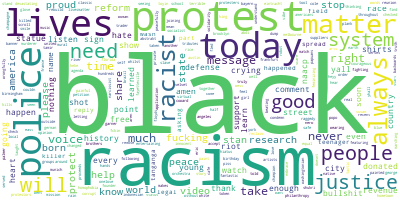

In [33]:
# Import the wordcloud library
from wordcloud import WordCloud
# Join the different processed titles together.(SENSITIVE TWEETS)
long_string = ','.join(list(new_y['tidy_tweet'].values))
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()

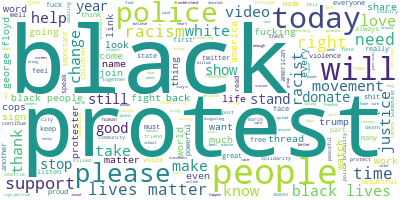

In [34]:
from wordcloud import WordCloud
# Join the different processed titles together.(NON SENSITIVE TWEETS)
long_string = ','.join(list(new_n['tidy_tweet'].values))
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()

In [35]:
# Calculating the average sentiment score of the hate speech tweets specific to the event:
def text_blob_sentiment(tweet):
    return TextBlob(tweet).polarity
sentiment = new_y['tidy_tweet'].map(text_blob_sentiment) #sensitve tweets
sentiment.mean()

0.01786616161616162

In [28]:

sentiment = new_n['tidy_tweet'].map(text_blob_sentiment) #non-sensitive tweet
sentiment.mean()

0.057757080666003796

In [36]:
f = open("C:\\Users\\Administrator\\Desktop\\Spring 2020-2021\\SPROJ\\stop_words.txt",'r') 
for line in f:
    wrd = line.strip()
    stop.append(wrd)
f.close()

#Additional list based on commonly used stopwords specific to BLM dataframe:
additional  = ['from', 'https', 'twitter', 'religions', 'pic','twitt','','rt','rts','retweet']
swords = set().union(stopwords.words('english'),additional,stop)

In [37]:
# Now time for topic modelling #Sensitive:

from gensim.utils import simple_preprocess
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *

stemmer = SnowballStemmer('english')

def lemmatize_stemming(text):
    return stemmer.stem(WordNetLemmatizer().lemmatize(text))

def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in swords and len(token) > 3:
            result.append((lemmatize_stemming(token)))
    return result

new_y['final_tweet'] = new_y['tidy_tweet'].map(preprocess)
df['final_tweet'] = df['tidy_tweet'].map(preprocess)
# Build the bigram and trigram models

data = df['final_tweet'].values.tolist()
bigram = gensim.models.Phrases(data, min_count=5, threshold=50) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data], threshold=50)  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

# Form Bigrams and Trigrams (phrases of two or three words that occur together and hence carry more meaning than a single word)
data_words_bigrams = make_bigrams(data)
data_words_trigrams = make_trigrams(data)

# Create Dictionary
id2word = Dictionary(data_words_bigrams)
print(len(id2word))
id2word.filter_extremes(no_below=10, no_above=0.99)
print(len(id2word))

# Create Corpus
texts = data_words_trigrams

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

4280
416


In [38]:
lda_model = gensim.models.LdaMulticore(corpus, num_topics=30, id2word=id2word, passes=25, workers=3)

In [39]:
for idx, topic in lda_model.print_topics(-1):
    print(f"Topic : {idx} \nWords: {topic}\n")

Topic : 0 
Words: 0.136*"need" + 0.113*"good" + 0.065*"beauti" + 0.057*"famili" + 0.056*"say" + 0.052*"sure" + 0.045*"start" + 0.036*"walk" + 0.035*"equal" + 0.031*"rememb"

Topic : 1 
Words: 0.162*"stand" + 0.090*"back" + 0.078*"free" + 0.065*"georg_floyd" + 0.061*"racism" + 0.055*"disgust" + 0.049*"fight" + 0.045*"heart" + 0.037*"friend" + 0.033*"anyth"

Topic : 2 
Words: 0.150*"never" + 0.115*"keep" + 0.064*"street" + 0.063*"demand" + 0.055*"around" + 0.040*"vote" + 0.036*"get" + 0.033*"minut" + 0.032*"african" + 0.023*"go"

Topic : 3 
Words: 0.156*"white" + 0.109*"life" + 0.062*"polic" + 0.047*"anti" + 0.046*"racism" + 0.040*"violenc" + 0.038*"hate" + 0.034*"without" + 0.034*"public" + 0.029*"black"

Topic : 4 
Words: 0.108*"matter" + 0.063*"worth" + 0.057*"young" + 0.053*"liter" + 0.051*"believ" + 0.045*"shot" + 0.044*"number" + 0.041*"polit" + 0.034*"platform" + 0.034*"remov"

Topic : 5 
Words: 0.173*"stop" + 0.120*"power" + 0.075*"read" + 0.037*"commit" + 0.032*"injustic" + 0.03

In [40]:
# Checking the quality of our model via coherence scores & perplexity scores:
from gensim.models import CoherenceModel
coherence_model_lda = CoherenceModel(model=lda_model, texts=texts, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)

base_perplexity = lda_model.log_perplexity(corpus)
print('\nPerplexity: ', base_perplexity) 


Coherence Score:  0.44690729188700956

Perplexity:  -6.433510596894099


In [41]:
# Now time for topic modelling #Sensitive:

from gensim.utils import simple_preprocess
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *

stemmer = SnowballStemmer('english')

def lemmatize_stemming(text):
    return stemmer.stem(WordNetLemmatizer().lemmatize(text))

def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in swords and len(token) > 3:
            result.append((lemmatize_stemming(token)))
    return result

new_n['final_tweet'] = new_n['tidy_tweet'].map(preprocess)

# Build the bigram and trigram models

data = df['final_tweet'].values.tolist()
bigram = gensim.models.Phrases(data, min_count=5, threshold=50) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data], threshold=50)  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

# Form Bigrams and Trigrams (phrases of two or three words that occur together and hence carry more meaning than a single word)
data_words_bigrams = make_bigrams(data)
data_words_trigrams = make_trigrams(data)

# Create Dictionary
id2word = Dictionary(data_words_bigrams)
print(len(id2word))
id2word.filter_extremes(no_below=10, no_above=0.99)
print(len(id2word))

# Create Corpus
texts = data_words_trigrams

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

4280
416


In [42]:
lda_model = gensim.models.LdaMulticore(corpus, num_topics=30, id2word=id2word, passes=25, workers=3)

In [43]:
for idx, topic in lda_model.print_topics(-1):
    print(f"Topic : {idx} \nWords: {topic}\n")

Topic : 0 
Words: 0.463*"black" + 0.187*"life_matter" + 0.035*"amaz" + 0.024*"exact" + 0.024*"artist" + 0.022*"paint" + 0.021*"guess" + 0.019*"say" + 0.019*"yesterday" + 0.017*"friend"

Topic : 1 
Words: 0.207*"video" + 0.105*"great" + 0.085*"learn" + 0.049*"link" + 0.044*"full" + 0.043*"follow" + 0.043*"turn" + 0.042*"racism" + 0.033*"pictur" + 0.031*"medium"

Topic : 2 
Words: 0.149*"sign" + 0.128*"march" + 0.058*"london" + 0.057*"today" + 0.054*"protest" + 0.048*"move" + 0.040*"peopl" + 0.039*"home" + 0.035*"respons" + 0.034*"hundr"

Topic : 3 
Words: 0.240*"like" + 0.071*"peopl" + 0.033*"blue" + 0.029*"polic" + 0.029*"innoc" + 0.027*"mani" + 0.026*"charg" + 0.024*"protestor" + 0.024*"see" + 0.021*"would"

Topic : 4 
Words: 0.092*"state" + 0.088*"even" + 0.077*"post" + 0.050*"offici" + 0.045*"gonna" + 0.041*"unit" + 0.038*"member" + 0.033*"violenc" + 0.033*"platform" + 0.025*"communiti"

Topic : 5 
Words: 0.118*"world" + 0.080*"stori" + 0.071*"human" + 0.055*"chang" + 0.045*"mean" +

In [44]:
# Checking the quality of our model via coherence scores & perplexity scores:
from gensim.models import CoherenceModel
coherence_model_lda = CoherenceModel(model=lda_model, texts=texts, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)

base_perplexity = lda_model.log_perplexity(corpus)
print('\nPerplexity: ', base_perplexity) 


Coherence Score:  0.45275380877641247

Perplexity:  -6.41312056837183


In [45]:
new_copy = df['final_tweet'].copy()
#new_copy
print(new_copy.values.tolist())

[['lesson', 'never', 'teach', 'white'], ['everyth', 'go'], ['racism', 'born', 'taught'], ['thread', 'petit', 'sign', 'spread', 'link'], ['best', 'explan', 'seen', 'color', 'blind', 'valid', 'approach', 'fight', 'racism'], ['know', 'link', 'everywher', 'seen'], ['burn', 'insid'], ['yerrrrrrrr', 'dominican', 'puerto', 'rican', 'south', 'american', 'mexican', 'black', 'fuck', 'everyon', 'seem', 'forget'], ['protest', 'anytim', 'soon'], ['slam'], ['unit', 'stand', 'divid', 'fall'], ['today', 'worker', 'amazon', 'own', 'whole', 'food', 'sent', 'home', 'wear', 'pin', 'happen', 'pearl', 'locat', 'pearl', 'locat', 'worker', 'tibetan', 'communiti', 'die', 'covid', 'last', 'shift'], ['cking', 'america'], ['uniti', 'strength'], ['speak', 'voic', 'matter', 'video', 'mine'], ['innoc', 'life', 'corrupt', 'polic', 'token', 'wrong', 'kill', 'bullshit', 'enough', 'world', 'need', 'come', 'togeth', 'race', 'onelov', 'heart'], ['donat', 'million'], [], ['could', 'happen', 'quit', 'immedi'], ['heartless']

In [46]:
new_copy = np.concatenate(new_copy.values.tolist())
#object = nltk.ngrams(new_copy, 2)
new_copy

array(['lesson', 'never', 'teach', ..., 'need', 'share', 'support'],
      dtype='<U32')

In [47]:
len(new_copy)

20070

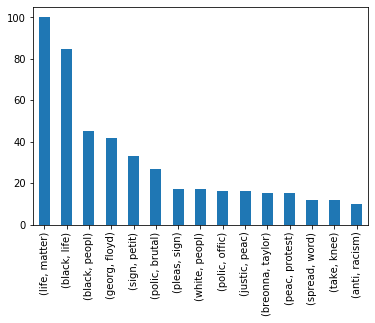

In [48]:
pd.Series(nltk.ngrams(new_copy, 2)).value_counts()[:15].plot(kind = 'bar')

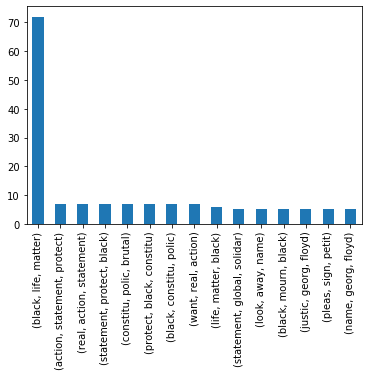

In [49]:
# Trigram model - top 15 
pd.Series(nltk.ngrams(new_copy, 3)).value_counts()[:15].plot(kind = 'bar')

In [50]:
bigramlist = pd.Series(nltk.ngrams(new_copy, 2)).tolist()
type(bigramlist)
bigramlist

# Unpacked tuples into bigrams:
list1 = [' '.join(x) for x in bigramlist]
list1

len(list1)

20069

In [51]:
trigramlist = pd.Series(nltk.ngrams(new_copy, 3)).tolist()
type(trigramlist)
trigramlist

# Unpacked tuples into bigrams:
list2 = [' '.join(x) for x in bigramlist]
list2

len(list2)

20069

In [53]:
# No of bigrams
from collections import Counter
dictionary = Counter(list1)
#dictionary = Dictionary(dictionary)

#from itertools import dropwhile

#for key, count in dropwhile(lambda key_count: key_count[1] >= 2, dictionary.most_common()):
 #   del dictionary[key]
    
# Count the bigram values in the data set and dropping the ones below 2:
new_dict = Counter(el for el in dictionary.elements() if dictionary[el] >= 2)


print(len(new_dict))
print(len(dictionary))
#bigram_list = dictionary.keys()


1140
17795


In [54]:
# Bigrams
pd.Series(nltk.ngrams(new_copy, 2)).nunique()

17795

In [55]:
from collections import Counter
dictionary_tri = Counter(list2)

new_dict2 = Counter(el for el in dictionary_tri.elements() if dictionary_tri[el] >= 3)


print(len(new_dict2))
print(len(dictionary_tri))

368
17795


In [56]:
# Tri grams
pd.Series(nltk.ngrams(new_copy, 3)).nunique()

19659

In [57]:
# Unigram
pd.Series(nltk.ngrams(new_copy, 1)).nunique()

4268

In [58]:
df['cleaned_tweet'] = df['final_tweet'].map(lambda x: ' '.join([str(elem) for elem in x]))


In [59]:
df['cleaned_tweet']

1                                 lesson never teach white
6                                               everyth go
7                                       racism born taught
9                            thread petit sign spread link
11       best explan seen color blind valid approach fi...
                               ...                        
22173    inspir join today queen gather black life rall...
22174                                                repli
22178                                 go dumb better tough
22195                                  anoth leftist studi
22199           movement still go still need share support
Name: cleaned_tweet, Length: 3223, dtype: object

In [60]:
# Each row has a count of occurences of a bigram
featurem = np.zeros(shape = (len(df['cleaned_tweet']), len(new_dict.keys()))) 

In [61]:
for i,tweet in enumerate(df['cleaned_tweet'].copy()):
    count = 0
    for j,bigram in enumerate (new_dict.keys()):
        count = tweet.count(bigram)
        featurem[i][j] = count


In [62]:
# Counts the max occurence of bigram in a particular tweet
featurem.max()

5.0

In [63]:
# Each row has a count of occurences of a bigram
featuret = np.zeros(shape = (len(df['cleaned_tweet']), len(new_dict2.keys()))) 
featuret.shape

(3223, 368)

In [64]:
for i,tweet in enumerate(df['cleaned_tweet'].copy()):
    count = 0
    for j,trigram in enumerate (new_dict2.keys()):
        countn = tweet.count(trigram)
        featuret[i][j] = countn

In [65]:
# Max occurence of trigram in a tweet
featuret.max()

5.0

In [66]:
#print(type(data_words_bigrams))
#print(data_words_bigrams) 
x = np.array(data_words_trigrams)
x = np.concatenate(x)
#plt.plot(data_words_trigrams)
#corpus

In [67]:
# Exploratory tri-gram features analysis:
import nltk

from collections import Counter

Counter(x)

Counter({'lesson': 4,
         'never': 45,
         'teach': 9,
         'white': 89,
         'everyth': 13,
         'go': 53,
         'racism': 110,
         'born': 8,
         'taught': 4,
         'thread': 42,
         'petit_sign': 8,
         'spread': 21,
         'link': 33,
         'best': 18,
         'explan': 4,
         'seen': 21,
         'color': 21,
         'blind': 1,
         'valid': 1,
         'approach': 1,
         'fight': 58,
         'know': 86,
         'everywher': 11,
         'burn': 9,
         'insid': 2,
         'yerrrrrrrr': 1,
         'dominican': 3,
         'puerto': 1,
         'rican': 1,
         'south': 14,
         'american': 42,
         'mexican': 1,
         'black': 365,
         'fuck': 86,
         'everyon': 33,
         'seem': 10,
         'forget': 24,
         'protest': 246,
         'anytim': 3,
         'soon': 13,
         'slam': 3,
         'unit': 19,
         'stand': 68,
         'divid': 4,
         'fall': 2,
 

In [68]:
# Now its time for another feature extraction: POS tags
import nltk
#nltk.download('punkt')
tokens = nltk.word_tokenize(df['cleaned_tweet'].to_string())
print(tokens)

['1', 'lesson', 'never', 'teach', 'white', '6', 'everyth', 'go', '7', 'racism', 'born', 'taught', '9', 'thread', 'petit', 'sign', 'spread', 'link', '11', 'best', 'explan', 'seen', 'color', 'blind', 'valid', 'approach', 'fi', '...', '16', 'know', 'link', 'everywher', 'seen', '20', 'burn', 'insid', '34', 'yerrrrrrrr', 'dominican', 'puerto', 'rican', 'south', 'americ', '...', '40', 'protest', 'anytim', 'soon', '45', 'slam', '47', 'unit', 'stand', 'divid', 'fall', '55', 'today', 'worker', 'amazon', 'own', 'whole', 'food', 'sent', 'home', 'w', '...', '61', 'cking', 'america', '65', 'uniti', 'strength', '70', 'speak', 'voic', 'matter', 'video', 'mine', '72', 'innoc', 'life', 'corrupt', 'polic', 'token', 'wrong', 'kill', 'bull', '...', '85', 'donat', 'million', '86', '102', 'could', 'happen', 'quit', 'immedi', '109', 'heartless', '115', 'disrupt', 'nuclear', 'famili', 'part', 'manifesto', 'though', '117', 'anoth', 'white', 'peopl', 'genet', 'defici', 'racist', 'someon', 'p', '...', '120', 'st

In [70]:
#nltk.download('averaged_perceptron_tagger')
print("Parts of speech tags: ", nltk.pos_tag(tokens))

Parts of speech tags:  [('1', 'CD'), ('lesson', 'NN'), ('never', 'RB'), ('teach', 'VBP'), ('white', 'JJ'), ('6', 'CD'), ('everyth', 'NN'), ('go', 'VBP'), ('7', 'CD'), ('racism', 'NN'), ('born', 'VBN'), ('taught', 'VBD'), ('9', 'CD'), ('thread', 'JJ'), ('petit', 'NN'), ('sign', 'NN'), ('spread', 'NN'), ('link', 'VBP'), ('11', 'CD'), ('best', 'JJS'), ('explan', 'NN'), ('seen', 'VBN'), ('color', 'NN'), ('blind', 'NN'), ('valid', 'JJ'), ('approach', 'NN'), ('fi', 'NN'), ('...', ':'), ('16', 'CD'), ('know', 'JJ'), ('link', 'NN'), ('everywher', 'RB'), ('seen', 'VBN'), ('20', 'CD'), ('burn', 'JJ'), ('insid', 'NN'), ('34', 'CD'), ('yerrrrrrrr', 'NN'), ('dominican', 'JJ'), ('puerto', 'JJ'), ('rican', 'JJ'), ('south', 'NN'), ('americ', 'JJ'), ('...', ':'), ('40', 'CD'), ('protest', 'NN'), ('anytim', 'NN'), ('soon', 'RB'), ('45', 'CD'), ('slam', 'JJ'), ('47', 'CD'), ('unit', 'NN'), ('stand', 'NN'), ('divid', 'VBP'), ('fall', 'NN'), ('55', 'CD'), ('today', 'NN'), ('worker', 'NN'), ('amazon', 'VBD'

In [71]:
pos = nltk.pos_tag(tokens)
pos

[('1', 'CD'),
 ('lesson', 'NN'),
 ('never', 'RB'),
 ('teach', 'VBP'),
 ('white', 'JJ'),
 ('6', 'CD'),
 ('everyth', 'NN'),
 ('go', 'VBP'),
 ('7', 'CD'),
 ('racism', 'NN'),
 ('born', 'VBN'),
 ('taught', 'VBD'),
 ('9', 'CD'),
 ('thread', 'JJ'),
 ('petit', 'NN'),
 ('sign', 'NN'),
 ('spread', 'NN'),
 ('link', 'VBP'),
 ('11', 'CD'),
 ('best', 'JJS'),
 ('explan', 'NN'),
 ('seen', 'VBN'),
 ('color', 'NN'),
 ('blind', 'NN'),
 ('valid', 'JJ'),
 ('approach', 'NN'),
 ('fi', 'NN'),
 ('...', ':'),
 ('16', 'CD'),
 ('know', 'JJ'),
 ('link', 'NN'),
 ('everywher', 'RB'),
 ('seen', 'VBN'),
 ('20', 'CD'),
 ('burn', 'JJ'),
 ('insid', 'NN'),
 ('34', 'CD'),
 ('yerrrrrrrr', 'NN'),
 ('dominican', 'JJ'),
 ('puerto', 'JJ'),
 ('rican', 'JJ'),
 ('south', 'NN'),
 ('americ', 'JJ'),
 ('...', ':'),
 ('40', 'CD'),
 ('protest', 'NN'),
 ('anytim', 'NN'),
 ('soon', 'RB'),
 ('45', 'CD'),
 ('slam', 'JJ'),
 ('47', 'CD'),
 ('unit', 'NN'),
 ('stand', 'NN'),
 ('divid', 'VBP'),
 ('fall', 'NN'),
 ('55', 'CD'),
 ('today', 'NN'),
 

In [73]:
pos_str = ' '.join([str(elem) for elem in pos])
type(pos_str)

str

In [74]:
# Now its time to stack all the features into a single matrix:
matrixa = np.concatenate([featurem, featuret], axis = 1)
#matrixa = tuple(map(tuple, matrixa))
#matrixb = np.concatenate([pos], axis = 1)
#matrixb = tuple(map(tuple, matrixb))
type(matrixa)
#type(matrixb)
#feature_matrix = matrixa + matrixb
#matrixb
#print(matrixa + matrixb)
matrixa.shape

(3223, 1508)

In [75]:
df.possibly_sensitive

1        0.0
6        0.0
7        1.0
9        0.0
11       0.0
        ... 
22173    0.0
22174    0.0
22178    0.0
22195    0.0
22199    0.0
Name: possibly_sensitive, Length: 3223, dtype: float64

In [76]:
df

,created_at,id,id_str,full_text,truncated,display_text_range,entities,source,in_reply_to_status_id,in_reply_to_status_id_str,...,quoted_status_id,quoted_status_id_str,quoted_status_permalink,quoted_status,withheld_in_countries,withheld_scope,withheld_copyright,tidy_tweet,final_tweet,cleaned_tweet
1,2020-05-16 15:03:09+00:00,1261673548885745665,1261673548885745664,RT @koan4u: 10 lessons I will never have to te...,False,"[0, 122]","{'hashtags': [{'text': 'ResistRacism', 'indice...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,lessons will never have teach white,"[lesson, never, teach, white]",lesson never teach white
6,2020-05-30 08:19:13+00:00,1266645325663678465,1266645325663678464,RT @its_emmanuelll: With everything going on p...,False,"[0, 93]","{'hashtags': [{'text': 'BlackLivesMatter', 'in...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,with everything going,"[everyth, go]",everyth go
7,2020-05-31 11:28:54+00:00,1267055449637097472,1267055449637097472,RT @buzztinholly: racism isn't born it's taugh...,False,"[0, 89]","{'hashtags': [{'text': 'BlackLivesMatter', 'in...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,racism born taught,"[racism, born, taught]",racism born taught
9,2020-06-01 05:28:49+00:00,1267327220676263936,1267327220676263936,RT @rosiegguks: ‼️ THREAD: PETITIONS TO SIGN ~...,False,"[0, 117]","{'hashtags': [{'text': 'BlackLivesMatter', 'in...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,thread petitions sign retweet spread links,"[thread, petit, sign, spread, link]",thread petit sign spread link
11,2020-06-03 08:08:35+00:00,1268092201013256192,1268092201013256192,The best explanation I've seen as to why color...,False,"[0, 97]","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com/download/android"" ...",NaN,NaN,...,1.267898e+18,1.267898e+18,"{'url': 'https://t.co/HrdVS7kngi', 'expanded':...",{'created_at': 'Tue Jun 02 19:17:34 +0000 2020...,NaN,NaN,NaN,best explanation seen color blindness valid ap...,"[best, explan, seen, color, blind, valid, appr...",best explan seen color blind valid approach fi...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22173,2020-06-08 03:31:11+00:00,1269834330546802689,1269834330546802688,So inspiring to join today's Queens Gathering ...,False,"[0, 238]","{'hashtags': [{'text': 'BlackLivesMatter', 'in...","<a href=""http://twitter.com/download/android"" ...",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inspiring join today queens gathering black li...,"[inspir, join, today, queen, gather, black, li...",inspir join today queen gather black life rall...
22174,2020-06-08 17:15:36+00:00,1270041800141688832,1270041800141688832,They’re BIG MAD in the replies 😂😂😂 https://t.c...,False,"[0, 34]","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,...,1.269694e+18,1.269694e+18,"{'url': 'https://t.co/hhibqsxUn0', 'expanded':...",{'created_at': 'Sun Jun 07 18:11:36 +0000 2020...,NaN,NaN,NaN,they replies,[repli],repli
22178,2020-06-11 04:11:56+00:00,1270931749040582656,1270931749040582656,If you’re going to be dumb you better be tough...,False,"[0, 47]","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,...,1.270929e+18,1.270929e+18,"{'url': 'https://t.co/QfY9n64sNi', 'expanded':...",{'created_at': 'Thu Jun 11 04:01:14 +0000 2020...,NaN,NaN,NaN,going dumb better tough,"[go, dumb, better, tough]",go dumb better tough
22195,2020-06-25 14:26:04+00:00,1276159732399685635,1276159732399685632,Another leftist “study” https://t.co/dhLQnslODO,False,"[0, 23]","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,...,1.276016e+18,1.276016e+18,"{'url': 'https://t.co

In [81]:
from sklearn import preprocessing
#creating labelEncoder
#le = preprocessing.LabelEncoder()
#df2 = df1[["possibly_sensitive"]]
#df2
#df1 = df1[(df['possibly_sensitive'] == 1) | (df['possibly_sensitive'] == 0) ]
#print(df1.possibly_sensitive)
labels = df['possibly_sensitive'].values
#df1['possibly_sensitive'] == 1
#df[df['possibly_sensitive'] == 0 or df['possibly_sensitive'] == 1] 
#new


# Converting string labels into numbers.
#wheather_encoded=le.fit_transform(label1)
#print (wheather_encoded)

In [79]:
len(labels)

3223

In [80]:
type(labels)

numpy.ndarray

In [82]:
from sklearn.model_selection import train_test_split

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(matrixa,labels, test_size=0.20,random_state=100) # 75% training and 25% test

In [83]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB

#Create a Gaussian Classifier
gnb = MultinomialNB()

#Train the model using the training sets
gnb.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = gnb.predict(X_test)

In [84]:
y_pred

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [85]:
from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9348837209302325


Text(30.453124999999993, 0.5, 'predicted label')

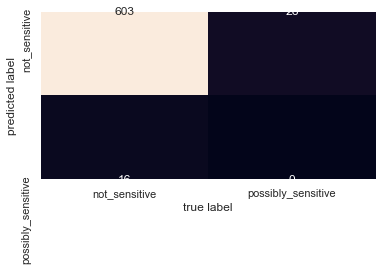

In [86]:
from sklearn.metrics import confusion_matrix 
import seaborn as sns; sns.set()
#confusion_matrix(y_test, y_pred)
mat = confusion_matrix(y_test, y_pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels= ['not_sensitive', 'possibly_sensitive'], yticklabels= ['not_sensitive', 'possibly_sensitive'])
plt.xlabel('true label')
plt.ylabel('predicted label')

In [87]:
mat

array([[603,  16],
       [ 26,   0]], dtype=int64)

In [88]:
# Support Vector Machine (SVM) Classification:
stop_words = set(stopwords.words('english'))
wordnet_lemmatizer = WordNetLemmatizer()

def normalizer(tweet):
    only_letters = re.sub("[^a-zA-Z]", " ",tweet) 
    tokens = nltk.word_tokenize(only_letters)[2:]
    lower_case = [l.lower() for l in tokens]
    filtered_result = list(filter(lambda l: l not in stop_words, lower_case))
    lemmas = [wordnet_lemmatizer.lemmatize(t) for t in filtered_result]
    return lemmas

#normalizer("Hello I am Afnan")


In [89]:
df['normalized_tweet'] = df.tidy_tweet.apply(normalizer)

In [90]:
df[['tidy_tweet','normalized_tweet']].head()

,tidy_tweet,normalized_tweet
1,lessons will never have teach white,"[never, teach, white]"
6,with everything going,[going]
7,racism born taught,[taught]
9,thread petitions sign retweet spread links,"[sign, retweet, spread, link]"
11,best explanation seen color blindness valid ap...,"[seen, color, blindness, valid, approach, figh..."


In [91]:
from nltk import ngrams
def ngrams(input_list):
    #onegrams = input_list
    bigrams = [' '.join(t) for t in list(zip(input_list, input_list[1:]))]
    trigrams = [' '.join(t) for t in list(zip(input_list, input_list[1:], input_list[2:]))]
    return bigrams+trigrams
df['grams'] = df.normalized_tweet.apply(ngrams)
df[['grams']].head()

,grams
1,"[never teach, teach white, never teach white]"
6,[]
7,[]
9,"[sign retweet, retweet spread, spread link, si..."
11,"[seen color, color blindness, blindness valid,..."


In [92]:
def hatespeech1(possibly_sensitive):
    return {
        0:'nothatespeech',
        1:'hatespeech'
        
    }[possibly_sensitive]

In [93]:
targets = df.possibly_sensitive
targets

1        0.0
6        0.0
7        1.0
9        0.0
11       0.0
        ... 
22173    0.0
22174    0.0
22178    0.0
22195    0.0
22199    0.0
Name: possibly_sensitive, Length: 3223, dtype: float64

In [94]:
from sklearn.model_selection import train_test_split
data_train, data_test, target_train, target_test = train_test_split(matrixa ,targets.values ,test_size=0.2, random_state=0)

In [95]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn import svm
clf = OneVsRestClassifier(svm.SVC(gamma=0.01, C=100., probability=True, class_weight='balanced', kernel='linear'))
clf_output = clf.fit(data_train, target_train)

In [96]:
clf.score(data_test, target_test)

0.32248062015503876

In [97]:
pred_label = clf.predict(data_test)

In [98]:
type(data_test[1])
len(data_test)

645

In [99]:
type(target_test[1])
len(target_test)

645

In [100]:
data_test = data_test.flatten()
data_test.shape

(972660,)

Text(30.453125, 0.5, 'predicted label')

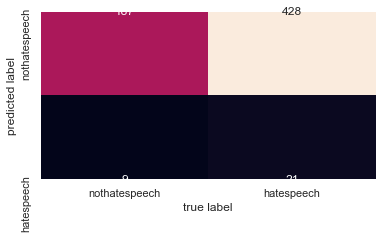

In [101]:
from sklearn.metrics import confusion_matrix 
import seaborn as sns; sns.set()
#confusion_matrix(y_test, y_pred)
mat2 = confusion_matrix(pred_label, target_test)
mat2

sns.heatmap(mat2.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels= ['nothatespeech', 'hatespeech'], yticklabels= ['nothatespeech', 'hatespeech'])
plt.xlabel('true label')
plt.ylabel('predicted label')

In [102]:
mat2

array([[187,   9],
       [428,  21]], dtype=int64)